<a href="https://colab.research.google.com/github/MHaley206265/DS-Unit-1-Sprint-2-Statistics/blob/master/module2/Matt_Haley_DSPT6_U1S2M2_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# imports
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

In [0]:
# read in data set
# Create a list of column names
column_headers = ['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']

# creating the data frame and passing in the column names
cvr = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data',
                     header=None,
                     names=column_headers,
                     na_values="?")


In [6]:
# look at the head of the data
cvr.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [11]:
# Lets look at the crime vote
# we will make a df for crime that drops NaN values

crime = cvr[['party', 'crime']].dropna()
crime.head()

,party,crime
0,republican,y
1,republican,y
2,democrat,y
3,democrat,n
4,democrat,y


In [14]:
# replace y and n with 1 and 0
crime = crime.replace({'y':1, 'n':0})
crime.head()

,party,crime
0,republican,1
1,republican,1
2,democrat,1
3,democrat,0
4,democrat,1


In [16]:
# generate a confidence interval for the crimes data
crimes_conf_int = stats.t.interval(0.95, # This is the alpha value
                                   crime.shape[0], # Sample Length
                                   loc = crime['crime'].mean(), # mean of data
                                   scale = stats.sem(crime['crime']) # std error of mean
                                   )

crimes_conf_int

(0.5460175245716772, 0.6405853462417199)

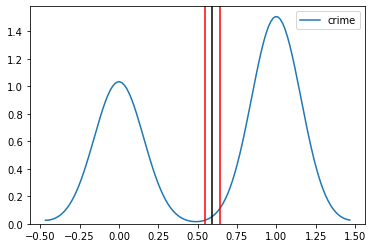

In [20]:
# creating a plot to show the vote info with confidence intervals
sns.kdeplot(crime['crime'])
for i in range(2):
  plt.axvline(crimes_conf_int[i], color = 'red')
plt.axvline(crime['crime'].mean(), color = 'black');

In [0]:
# The data shows that the null hypothesis can be discarded because it does not
# fall within the confidence interval of the data.  The '84 congress was 
# biased towards a yes vote on this issue and, with a high degree of certainty,
# it can be said that this outcome was not coincidental.  The data also means that,
# if this vote was held 100 times, the mean of the vote outcomes would fall 
# between 0.55 and 0.64 95 out of 100 times.

In [48]:
# Chi Squared test:
# importing a data set from a previous lesson

url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'

titanic = pd.read_csv(url)

titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [49]:
titanic['Fare'].describe()

count    712.000000
mean      34.567251
std       52.938648
min        0.000000
25%        8.050000
50%       15.645850
75%       33.000000
max      512.329200
Name: Fare, dtype: float64

In [50]:
# Creating a binned version of the fare feature
cut_points = [0, 9, 16, 34, 1000]
labels = ['low', 'medium', 'high', 'very_high']
titanic['fare_bins'] = pd.cut(titanic['Fare'], cut_points, labels=labels)

titanic[['Fare', 'fare_bins']].head(10)

,Fare,fare_bins
0,7.2500,low
1,71.2833,very_high
2,7.9250,low
3,53.1000,very_high
4,8.0500,low
5,51.8625,very_high
6,21.0750,high
7,11.1333,medium
8,30.0708,high
9,16.7000,high


In [58]:
# make a cross tab of sex and fare_bins
observed = pd.crosstab(titanic['Sex'], titanic['fare_bins'])
xtab_marg = pd.crosstab(titanic['Sex'], titanic['fare_bins'], margins=True)
xtab

fare_bins,low,medium,high,very_high
Sex,,,,
female,33,63,76,87
male,174,89,94,89


In [57]:
# make expected list
row_sums = xtab_marg.iloc[0:2, 4].values
col_sums = xtab_marg.iloc[2, 0:4].values
total = xtab_marg.loc['All', 'All']

expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column * row_sums[i] / total
    expected_row.append(expected_val)
  expected.append(expected_row)

expected = np.array(expected)
expected

array([[ 76.04680851,  55.84113475,  62.45390071,  64.65815603],
       [130.95319149,  96.15886525, 107.54609929, 111.34184397]])

In [62]:
# do chi squared calculation
chi_square = ((observed - expected)**2/(expected)).sum().sum()
chi_square

56.815375779732854

In [60]:
# use scipy
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)

print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 56.81537577973286
P-value: 2.8139901909966806e-12
Degrees of Freedom: 3
Expected: 
 [[ 76.04680851  55.84113475  62.45390071  64.65815603]
 [130.95319149  96.15886525 107.54609929 111.34184397]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)